# CS 6220 Data Mining — Assignment 8 — Decision Trees — Samuel Steiner

In [17]:
# Import packages 
import numpy as np
import graphviz 
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz


In [18]:
# load data
X, y = load_boston(return_X_y=True)

# Split the range of target values into three equal parts - low, mid, and high.
# Reassign the target values into into three categorical values 0, 1, and 2, representing low, mid and high range of values, respectively
diff = (y.max() - y.min())/3
d = y.min()
split = []
for _ in range(3):
    split.append([d, d+diff])
    d += diff

def categorize_target(value):
    for idx, rangx in enumerate(split):
        if value >= rangx[0] and value <= rangx[1]:
            return idx

y_ = np.array(list(map(categorize_target, y)))

In [19]:
# 1. Split the dataset into 70% training set and 30% test set.
X_train, X_test, y_train, y_test = train_test_split(X, y_, test_size=0.3)

In [20]:
# 2. Using scikit-learn’s DecisionTreeClassifier, train a supervised learning model that can be used to generate predictions for your data. 
# A reference to how you can do that can be found in the users manual at 
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [21]:
# 3. Report the tree depth, number of leaves, feature importance, train score, and test score of the tree. Let the tree depth be Td.

td = dt_clf.get_depth()

def report_on_dt(dt_):
        print(f"""
        Tree Depth: {dt_.get_depth()}
        Number of Leaves: {dt_.get_n_leaves()}
        Feature importance: {' '.join([f'Feature {idx+1}: {val:.3f}' for idx, val in enumerate(dt_.feature_importances_)])}
        Train score: {dt_.score(X_train, y_train)}
        Test score: {dt_.score(X_test, y_test):.3f}""")

report_on_dt(dt_clf)


        Tree Depth: 11
        Number of Leaves: 53
        Feature importance: Feature 1: 0.057 Feature 2: 0.006 Feature 3: 0.027 Feature 4: 0.000 Feature 5: 0.025 Feature 6: 0.243 Feature 7: 0.073 Feature 8: 0.072 Feature 9: 0.009 Feature 10: 0.046 Feature 11: 0.041 Feature 12: 0.031 Feature 13: 0.370
        Train score: 1.0
        Test score: 0.816


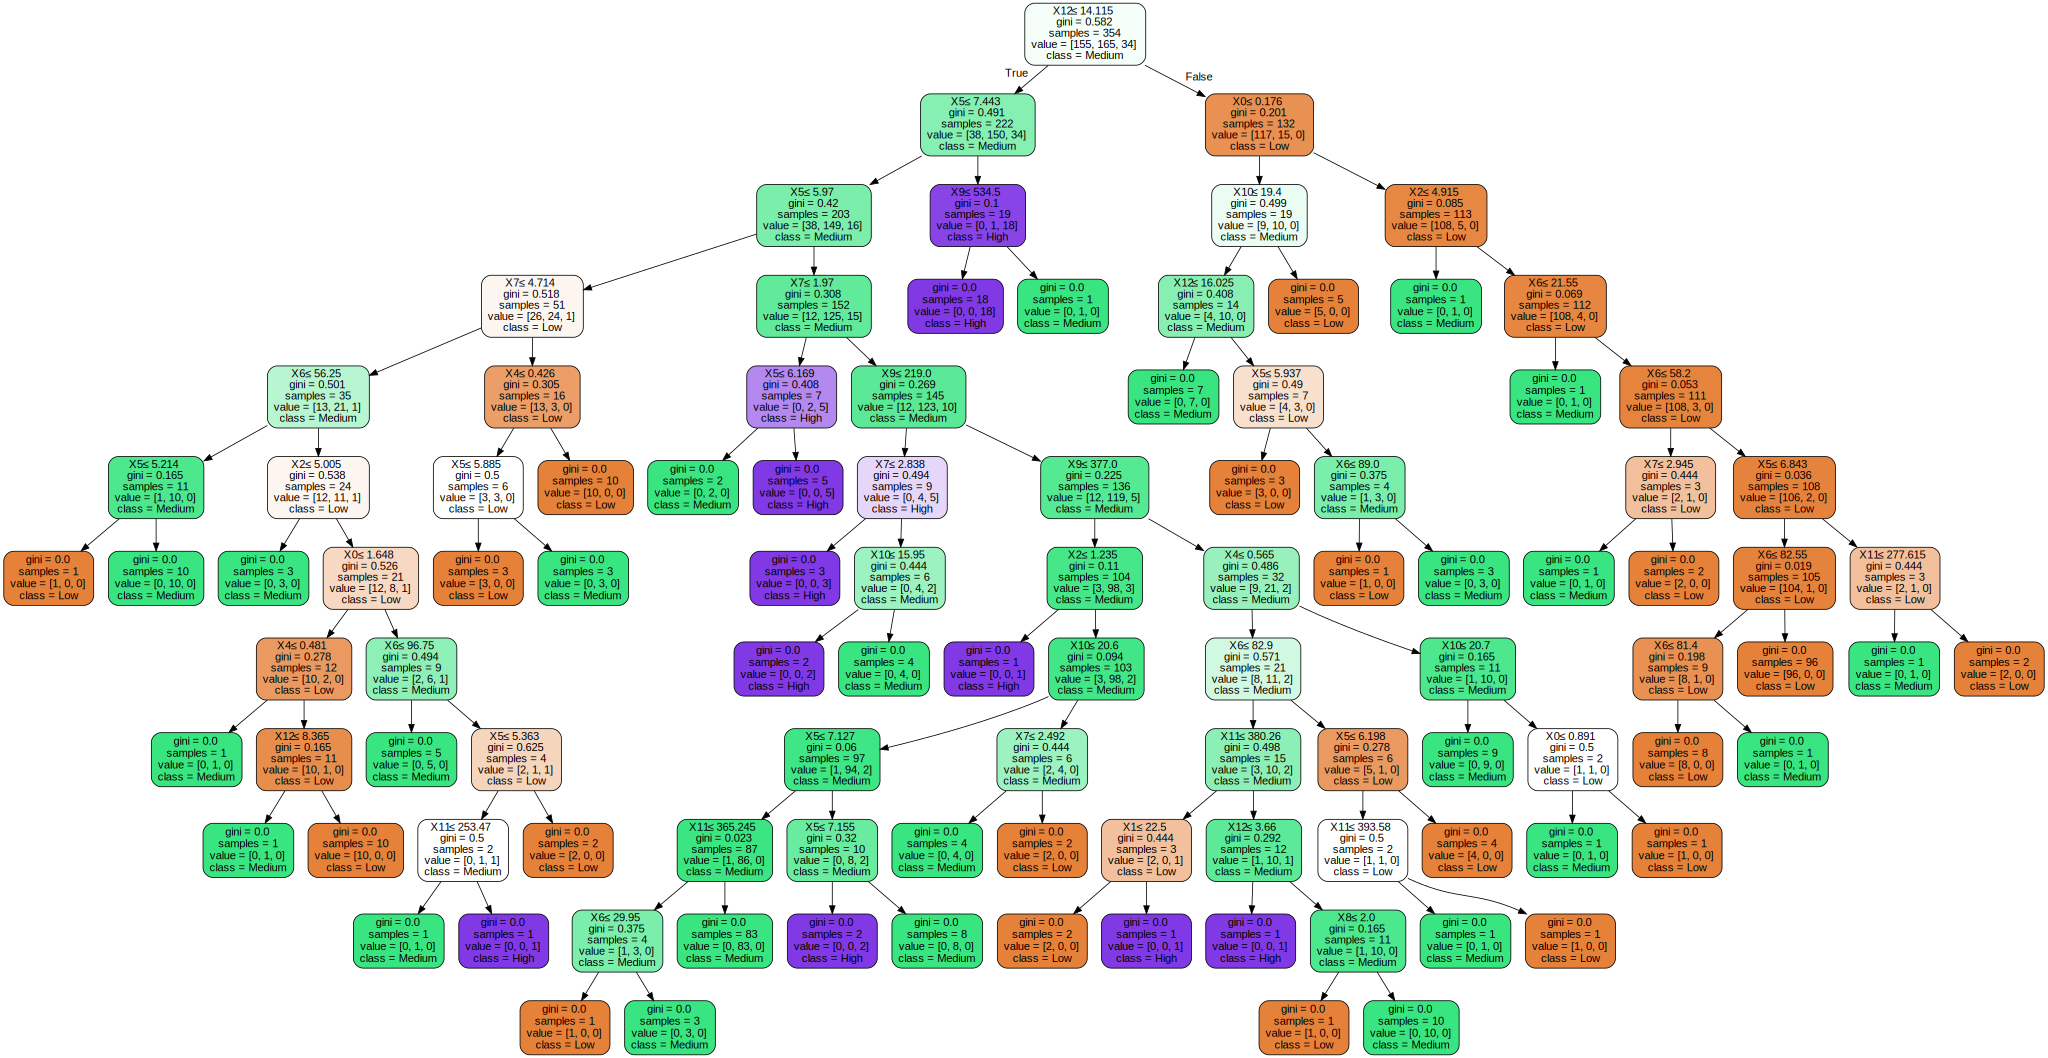

In [22]:
# 4. Show the visual output of the decision tree.
dot_data = export_graphviz(dt_clf, class_names=['Low', 'Medium', 'High'],  
                        filled=True, rounded=True,  special_characters=True)
graph = graphviz.Source(dot_data)
graph.render(f"boston_housing_{dt_clf.get_depth()}")
graph

In [23]:
# 5. Next, Generate (Td-1) decision trees on the same training set using fixed tree depths 
# {1, 2, ...(T d −1)}. The tree depth can be set using max=d, where d is the depth of the tree.

# 6. For each of the (Td-1) trees report, tree depth, number of leaves, feature importance,
# train score, and test score of the tree.
best = 0
best_clf = None
for depth in range(1, td):
    dt_set_clf = DecisionTreeClassifier(max_depth=depth)
    dt_set_clf.fit(X_train, y_train)
    report_on_dt(dt_set_clf)
    score = dt_set_clf.score(X_test, y_test)
    if score > best:
        best = score
        best_clf = dt_set_clf


        Tree Depth: 1
        Number of Leaves: 2
        Feature importance: Feature 1: 0.000 Feature 2: 0.000 Feature 3: 0.000 Feature 4: 0.000 Feature 5: 0.000 Feature 6: 0.000 Feature 7: 0.000 Feature 8: 0.000 Feature 9: 0.000 Feature 10: 0.000 Feature 11: 0.000 Feature 12: 0.000 Feature 13: 1.000
        Train score: 0.7542372881355932
        Test score: 0.770

        Tree Depth: 2
        Number of Leaves: 4
        Feature importance: Feature 1: 0.076 Feature 2: 0.000 Feature 3: 0.000 Feature 4: 0.000 Feature 5: 0.000 Feature 6: 0.218 Feature 7: 0.000 Feature 8: 0.000 Feature 9: 0.000 Feature 10: 0.000 Feature 11: 0.000 Feature 12: 0.000 Feature 13: 0.706
        Train score: 0.8050847457627118
        Test score: 0.842

        Tree Depth: 3
        Number of Leaves: 8
        Feature importance: Feature 1: 0.079 Feature 2: 0.000 Feature 3: 0.000 Feature 4: 0.000 Feature 5: 0.000 Feature 6: 0.284 Feature 7: 0.000 Feature 8: 0.000 Feature 9: 0.000 Feature 10: 0.000 Feature 11

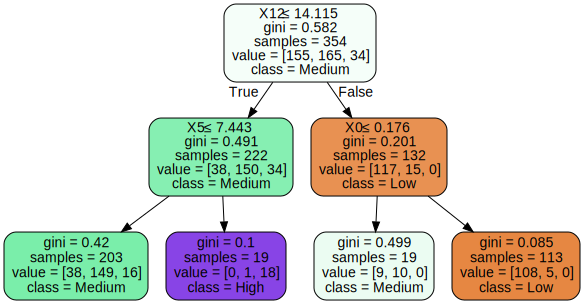

In [24]:
# 7. Show the visual output of the decision tree with highest test score from the (Td-1) trees.
dot_data = export_graphviz(best_clf, class_names=['Low', 'Medium', 'High'],  
                        filled=True, rounded=True,  special_characters=True)
graph = graphviz.Source(dot_data)
graph.render(f"boston_housing_{best_clf.get_depth()}")
graph